<a href="https://colab.research.google.com/github/zi-onion/24-2-ESAA/blob/main/11_29_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EA%B8%B0%EC%B4%88%26%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%9E%85%EB%AC%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **딥러닝 파이토치 교과서 - 입문부터 파인튜닝까지**


## **Ch 2. 파이토치 기초(PyTorch Basic)**


### 02-01 파이토치 패키지의 기본 구성

1. torch: 메인 네임스페이스. 텐서 등의 다양한 수학 함수가 포함되어져 있으며 넘파이와 유사한 구조를 가짐.

2. torch.autograd: 자동 미분을 위한 함수들이 포함되어 있음.
  - 콘텍스트 매니저, Function 등

3. torch.nn: 신경망을 구축하기 위한 다양한 데이터 구조나 레이어 등이 정의되어 있음.
  - RNN, LSTM과 같은 레이어, ReLU와 같은 활성화 함수, MSELoss와 같은 손실 함수 등

4. torch.optim: 확률적 경사 하강법을 중심으로 한 파라미터 최적화 알고리즘이 구현되어 있음.
  
5. torch.utils.data: SGD의 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수가 포함되어 있음.

6. torch.onnx: ONNX(Open Neural Network Exchange)의 포맷으로 모델을 익스포트(export)할 때 사용함.


### 02-02 텐서 조작하기(Tensor Manipulation)

#### 1. 벡터, 행렬 그리고 텐서(Vector, Matrix and Tensor)

  1) 벡터, 행렬, 텐서 그림으로 이해하기

  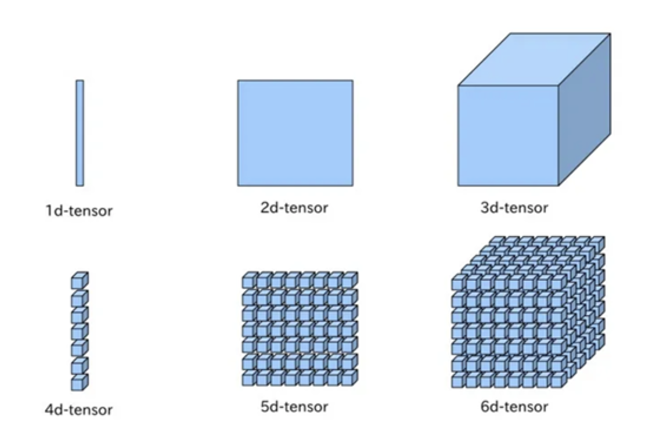


2) PyTorch Tensor Shape Convention
- 2D Tensor(Typical Simple Setting)

  - |t| = (Batch size, dim)
  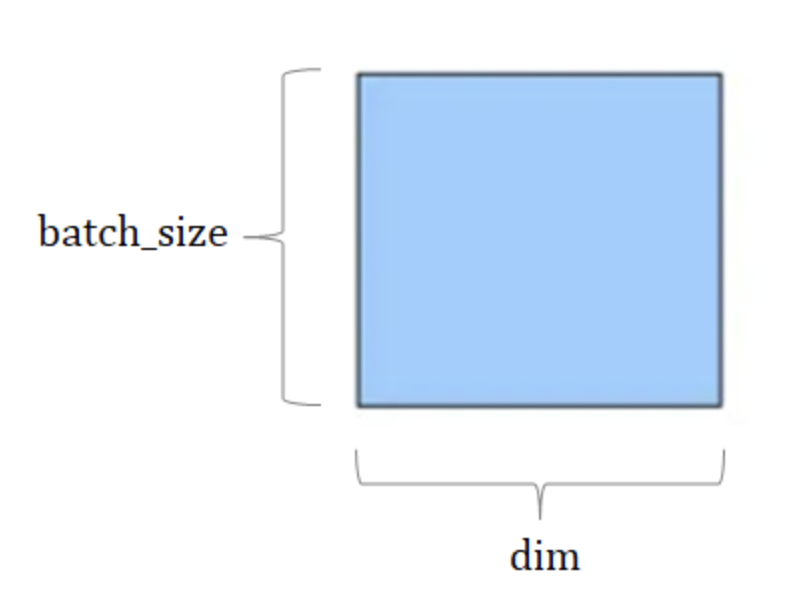


  - 3D Tensor(Typical Computer Vision)- 비전 분야에서의 3차원 텐서
      - |t| = (batch size, width, height)
  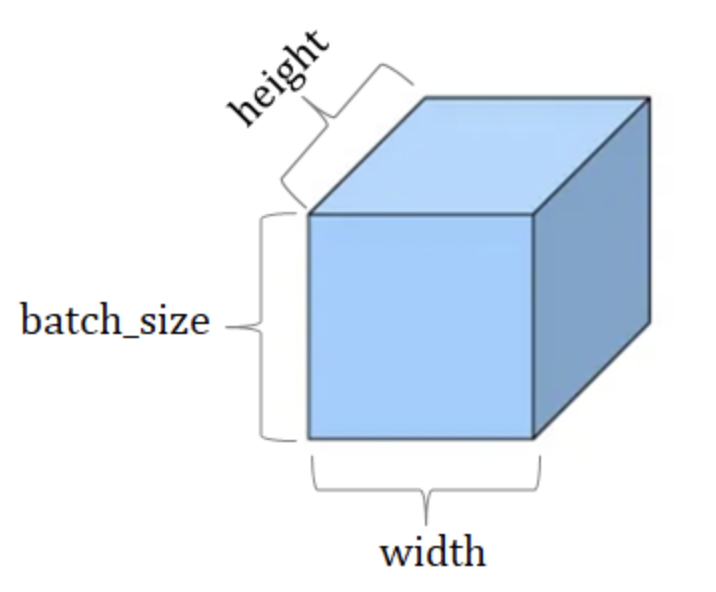

  - 3D Tensor(Typical Natural Language Processing)** - NLP 분야에서의 3차원 텐서
    - |t| = (batch size, length, dim)
  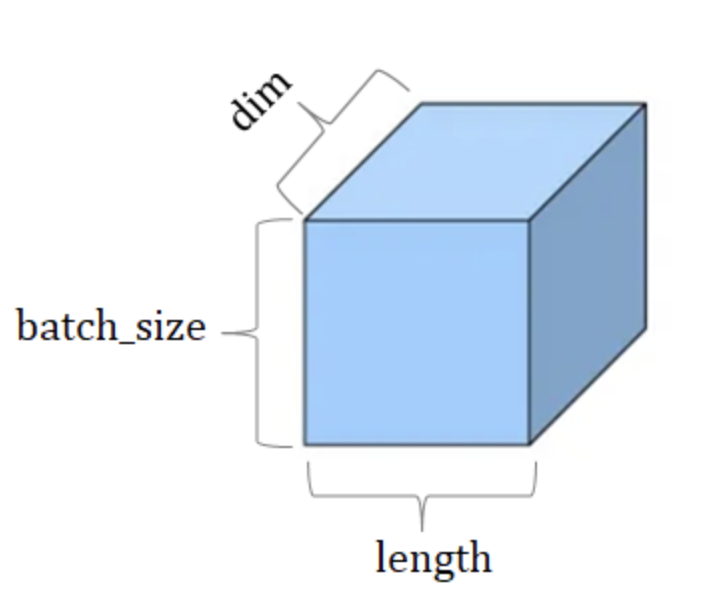

  - NLP 분야의 3D 텐서 예제로 이해하기

In [ ]:
# 전체 훈련 데이터
#[[나는 사과를 좋아해], [나는 바나나를 좋아해], [나는 사과를 싫어해], [나는 바나나를 싫어해]]

In [ ]:
# 4x3 2D 텐서
#[['나는', '사과를', '좋아해'], ['나는', '바나나를', '좋아해'], ['나는', '사과를', '싫어해'], ['나는', '바나나를', '싫어해']]

In [ ]:
# 3차원의 벡터
#'나는' = [0.1, 0.2, 0.9]
#'사과를' = [0.3, 0.5, 0.1]
#'바나나를' = [0.3, 0.5, 0.2]
#'좋아해' = [0.7, 0.6, 0.5]
#'싫어해' = [0.5, 0.6, 0.7]

In [ ]:
# 4 × 3 × 3의 크기를 가지는 3D 텐서
#[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]],
# [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.7, 0.6, 0.5]],
# [[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]],
# [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.5, 0.6, 0.7]]]

In [ ]:
#2 × 3 × 3
#첫번째 배치 #1
#[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.7, 0.6, 0.5]],
# [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.7, 0.6, 0.5]]]

#두번째 배치 #2
#[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]],
# [[0.1, 0.2, 0.9], [0.3, 0.5, 0.2], [0.5, 0.6, 0.7]]]

#### 2. 넘파이로 텐서 만들기(벡터와 행렬 만들기)

1) 1D with Numpy

In [1]:
import numpy as np

In [2]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
# 파이썬으로 설명하면 List를 생성해서 np.array로 1차원 array로 변환함.
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [3]:
print('Rank of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank of t:  1
Shape of t:  (7,)


1-1) Numpy 기초 이해하기

In [4]:
print('t[0] t[1] t[-1] = ', t[0], t[1], t[-1]) # 인덱스를 통한 원소 접근

t[0] t[1] t[-1] =  0.0 1.0 6.0


In [5]:
# 슬라이싱
print('t[2:5] t[4:-1]  = ', t[2:5], t[4:-1]) # [시작 번호 : 끝 번호]로 범위 지정을 통해 가져온다.

t[2:5] t[4:-1]  =  [2. 3. 4.] [4. 5.]


In [6]:
print('t[:2] t[3:]     = ', t[:2], t[3:]) # 시작 번호를 생략한 경우와 끝 번호를 생략한 경우

t[:2] t[3:]     =  [0. 1.] [3. 4. 5. 6.]


2) 2D with Numpy

In [7]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [8]:
print('Rank  of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank  of t:  2
Shape of t:  (4, 3)


#### 3. 파이토치 텐서 선언하기(PyTorch Tensor Allocation)

In [9]:
import torch

1) 1D with PyTorch

In [10]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


- dim(): 현재 텐서의 차원
- shape,  size(): 크기 확인

In [11]:
print(t.dim())  # rank. 즉, 차원
print(t.shape)  # shape
print(t.size()) # shape

1
torch.Size([7])
torch.Size([7])


In [12]:
print(t[0], t[1], t[-1])  # 인덱스로 접근
print(t[2:5], t[4:-1])    # 슬라이싱
print(t[:2], t[3:])       # 슬라이싱

tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


2) 2D with PyTorch

In [13]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [14]:
print(t.dim())  # rank. 즉, 차원
print(t.size()) # shape

2
torch.Size([4, 3])


In [15]:
print(t[:, 1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원의 첫번째 것만 가져온다.
print(t[:, 1].size()) # ↑ 위의 경우의 크기


tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


In [16]:
print(t[:, :-1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원에서는 맨 마지막에서 첫번째를 제외하고 다 가져온다.

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


3) 브로드캐스팅(Broadcasting)
- 자동으로 크기를 맞춰서 연산을 수행


In [17]:
# 같은 크기일 때
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


In [18]:
# 다른 크기일 때
# Vector + scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # [3] -> [3, 3]
print(m1 + m2)

tensor([[4., 5.]])


In [19]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


In [20]:
# 브로드캐스팅 과정에서 실제로 두 텐서가 어떻게 변경되는지 보겠습니다.

#[1, 2]
#==> [[1, 2],
#     [1, 2]]
#[3]
#[4]
#==> [[3, 3],
#     [4, 4]]

- 브로드캐스팅은 자동으로 수행되므로 사용자는 나중에 원하는 결과가 나오지 않았더라도 어디서 문제가 발생했는지 찾기가 굉장히 어려울 수 있음.

4) 자주 사용되는 기능들

1. 행렬 곱셈과 곱셈의 차이(Matrix Multiplication Vs. Multiplication)
- 행렬 곱셈(.matmul)
- 원소 별 곱셈(.mul)

In [21]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


In [22]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


-> 두 행렬의 크기는 브로드캐스팅이 된 후에 곱셈이 수행됨.

2. 평균(Mean)

In [23]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [24]:
t = torch.FloatTensor([[1, 2], [3, 4]]) # 2차원 행렬 선언
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [25]:
print(t.mean())

tensor(2.5000)


In [26]:
print(t.mean(dim=0)) # dim=0 : 첫번째 차원

tensor([2., 3.])


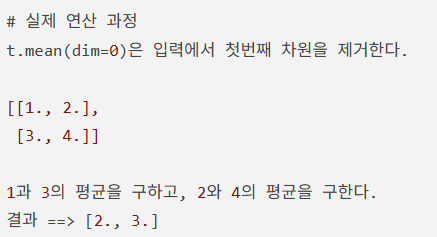

In [27]:
print(t.mean(dim=1))

tensor([1.5000, 3.5000])


In [28]:
print(t.mean(dim=-1)) # 마지막 차원 제거 = 열의 차원 제거

tensor([1.5000, 3.5000])


3. 덧셈(Sum)

In [29]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [30]:
print(t.sum()) # 단순히 원소 전체의 덧셈을 수행
print(t.sum(dim=0)) # 행을 제거
print(t.sum(dim=1)) # 열을 제거
print(t.sum(dim=-1)) # 열을 제거

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


4. 최대(Max)와 아그맥스(ArgMax)
- 최대(Max)는 원소의 최대값을 리턴하고, 아그맥스(ArgMax)는 최대값을 가진 인덱스를 리턴함.

In [31]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [32]:
print(t.max()) # Returns one value: max

tensor(4.)


In [33]:
print(t.max(dim=0)) # Returns two values: max and argmax

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


->  max에 dim 인자를 주면 argmax도 함께 리턴함. 첫번째 열에서 3의 인덱스는 1이었고, 두번째 열에서 4의 인덱스는 1이었음. 그러므로 [1, 1]이 리턴

In [34]:
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


In [35]:
print(t.max(dim=1))
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


5. 뷰(View) - 원소의 수를 유지하면서 텐서의 크기 변경
- 리쉐이프(Reshape)와 같은 역할
- view는 기본적으로 변경 전과 변경 후의 텐서 안의 원소의 개수가 유지되어야함.
- 파이토치의 view는 사이즈가 -1로 설정되면 다른 차원으로부터 해당 값을 유추함.

In [36]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)

In [37]:
print(ft.shape)

torch.Size([2, 2, 3])


5-1. 3차원 텐서에서 2차원 텐서로 변경

In [38]:
print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


5-2. 3차원 텐서의 크기 변경

In [39]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


6. 스퀴즈(Squeeze) - 1인 차원을 제거한다.

In [40]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [41]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


7. 언스퀴즈(Unsqueeze) - 특정 위치에 1인 차원을 추가한다.

In [42]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [43]:
print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [44]:
# view 로도 구현 가능
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [45]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [46]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


-> iew(), squeeze(), unsqueeze()는 텐서의 원소 수를 그대로 유지하면서 모양과 차원을 조절함.

8. 타입 캐스팅(Type Casting)
- 자료형을 변환하는 것

In [47]:
lt = torch.LongTensor([1, 2, 3, 4]) #long 타입
print(lt)

tensor([1, 2, 3, 4])


In [48]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [49]:
bt = torch.ByteTensor([True, False, False, True]) #Byte 타입
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [50]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


9. 연결하기(concatenate)

In [51]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [52]:
print(torch.cat([x, y], dim=0))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [53]:
print(torch.cat([x, y], dim=1))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


-> 두 텐서를 연결해서 입력으로 사용한다는 것은 두 가지 정보를 모두 사용한다는 의미

10. 스택킹(Stacking)

In [54]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [55]:
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


-> 3개의 벡터가 순차적으로 쌓여 (3 × 2) 텐서가 됨.

In [56]:
# 위 작업은 아래의 코드와 동일한 작업
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


-> x, y, z는 기존에는 전부 (2,)의 크기를 가졌습니다. 그런데 .unsqueeze(0)을 하므로서 3개의 벡터는 전부 (1, 2)의 크기의 2차원 텐서로 변경됨. 여기에 연결(concatenate)를 의미하는 cat을 사용하면 (3 x 2) 텐서가 됨.

In [57]:
print(torch.stack([x, y, z], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


11. ones_like와 zeros_like - 0으로 채워진 텐서와 1로 채워진 텐서

In [58]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [59]:
print(torch.ones_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 1로 채우기

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [60]:
print(torch.zeros_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 0으로 채우기

tensor([[0., 0., 0.],
        [0., 0., 0.]])


12. In-place Operation (덮어쓰기 연산)

In [61]:
x = torch.FloatTensor([[1, 2], [3, 4]])

In [62]:
print(x.mul(2.)) # 곱하기 2를 수행한 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


In [63]:
print(x.mul_(2.))  # 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


### 02-03 파이썬 클래스(class)

#### 1. 함수(function)과 클래스(Class)의 차이

1) 함수(function)로 덧셈기 구현하기

In [64]:
result = 0

def add(num):
    global result
    result += num
    return result

print(add(3))
print(add(4))

3
7


2) 함수(function)로 두 개의 덧셈기 구현하기

In [65]:
result1 = 0
result2 = 0

def add1(num):
    global result1
    result1 += num
    return result1

def add2(num):
    global result2
    result2 += num
    return result2

print(add1(3))
print(add1(4))
print(add2(3))
print(add2(7))

3
7
3
10


3) 클래스(class)로 덧셈기 구현하기

In [66]:
class Calculator:
    def __init__(self): # 객체 생성 시 호출될 때 실행되는 초기화 함수. 이를 생성자라고 한다.
        self.result = 0

    def add(self, num): # 객체 생성 후 사용할 수 있는 함수.
        self.result += num
        return self.result

In [67]:
cal1 = Calculator()
cal2 = Calculator()

print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))

3
7
3
10


## **Ch 3. 머신 러닝 입문하기(Machine Learning Basics)**

### 03-01 선형 회귀와 자동 미분(Linear Regression and Autograd)

#### 1. 데이터에 대한 이해

  1) 훈련 데이터셋과 테스트 데이터셋
  - 훈련 데이터셋: 예측을 위해 사용하는 데이터셋
  - 테스트 데이터셋: 모델이 얼마나 잘 작동하는지 판별하는 데이터셋

  2) 훈련 데이터셋의 구성
  -  x_train은 공부한 시간, y_train은 그에 맵핑되는 점수


In [68]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

#### 2. 가설 수립
- 선형 회귀: H(x) = Wx+b

#### 3. 비용 함수에 대한 이해
- 비용 함수(cost function) = 손실 함수(loss function) = 오차 함수(error function) = 목적 함수(objective function)

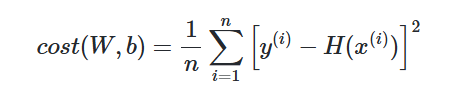

#### 4. 옵티마이저 - 경사 하강법(Gradient Descent)
- 옵티마이저 알고리즘: 비용 함수의 값을 최소로하는 W와 b를 찾아내는 과정
- 경사하강법:   비용 함수(Cost function)를 미분하여 현재 W
에서의 접선의 기울기를 구하고, 접선의 기울기가 낮은 방향으로 W
의 값을 변경하는 작업을 반복하는 것



- 에포크: 전체 훈련 데이터가 학습에 한 번 사용된 주

#### 5. 파이토치로 선형 회귀 구현하기


1) 기본 셋팅

In [159]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [160]:
# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록 랜덤 시드(random seed)를 줍니다.
torch.manual_seed(1)

2) 변수 선언

In [161]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [162]:
print(x_train)
print(x_train.shape)


tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [163]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


3) 가중치와 편향의 초기화

In [164]:
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함.
W = torch.zeros(1, requires_grad=True)
# 가중치 W를 출력
print(W)

tensor([0.], requires_grad=True)


-> 현 직선의 방정식은 y = 0*x +0과 같다.

In [165]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


4) 가설 세우기

H(x) = Wx + b

In [166]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


5) 비용 함수 선언하기
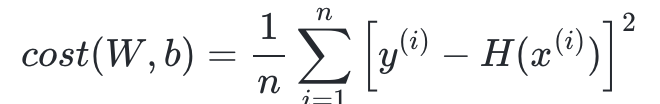

In [167]:
# 앞서 배운 torch.mean으로 평균을 구한다.
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


6) 경사 하강법 구현하기

- 'SGD'는 경사 하강법의 일종, 학습 대상인 W와 b가 SGD의 입력됨.
- lr: 학습률(learning rate)


In [168]:
optimizer = optim.SGD([W, b], lr=0.01)

In [169]:
# gradient를 0으로 초기화
optimizer.zero_grad()
# 비용 함수를 미분하여 gradient 계산
cost.backward()
# W와 b를 업데이트
optimizer.step()

7) 전체 코드

- 에포크(Epoch): 전체 훈련 데이터가 학습에 한 번 사용된 주기. 이번 실습의 경우 2,000번을 수행

In [170]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))


Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

#### 6. optimizer.zero_grad()가 필요한 이유
- 파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있음. -> 미분값을 계속 0으로 초기화시켜줘야 함.

In [81]:
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

  z = 2*w

  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


#### 7. torch.manual_seed()를 하는 이유
- torch.manual_seed()는 난수 발생 순서와 값을 동일하게 보장해줌.

In [82]:
import torch

In [83]:
torch.manual_seed(3)
print('랜덤 시드가 3일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 3일 때
tensor([0.0043])
tensor([0.1056])


In [84]:
torch.manual_seed(5)
print('랜덤 시드가 5일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 5일 때
tensor([0.8303])
tensor([0.1261])


In [85]:
torch.manual_seed(3)
print('랜덤 시드가 다시 3일 때')
for i in range(1,3):
  print(torch.rand(1)) # 동일

랜덤 시드가 다시 3일 때
tensor([0.0043])
tensor([0.1056])


#### 8. 자동 미분(Autograd) 실습하기

In [86]:
w = torch.tensor(2.0, requires_grad=True)

In [87]:
y = w**2
z = 2*y + 5

In [88]:
z.backward()

In [89]:
print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 8.0


### **03-02 다중 선형 회귀(Multivariable Linear regression)**

#### 1. 데이터에 대한 이해(Data Definition)
- 단순 선형 회귀와 다른 점 : 독립변수 x의 개수가 1개가 아니라 2개 이상
- H(x) = w1x1+ w2x2+x3x3+b



#### 2. 파이토치로 구현하기

In [90]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [91]:
torch.manual_seed(1)

In [92]:
# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [93]:
# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [94]:
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319507
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079390


#### 3. 벡터와 행렬 연산으로 바꾸기

1) 벡터 연산으로 이해하기

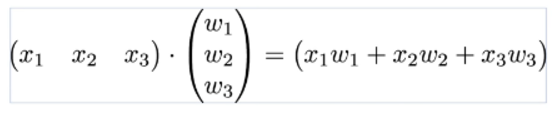

2) 행렬 연산으로 이해하기

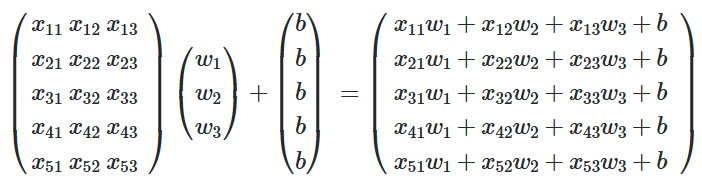

#### 4. 행렬 연산을 고려하여 파이토치로 구현하기

In [95]:
x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  80],
                               [96,  98,  100],
                               [73,  66,  70]])
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [96]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [97]:
# 가중치와 편향 선언
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [98]:
hypothesis = x_train.matmul(W) + b

In [99]:
x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  80],
                               [96,  98,  100],
                               [73,  66,  70]])
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 hyp

In [100]:
# 임의의 입력 값에 대한 예측
with torch.no_grad():
    new_input = torch.FloatTensor([[75, 85, 72]])  # 예측하고 싶은 임의의 입력
    prediction = new_input.matmul(W) + b
    print('Predicted value for input {}: {}'.format(new_input.squeeze().tolist(), prediction.item()))

Predicted value for input [75.0, 85.0, 72.0]: 156.8051300048828


### **03-03 nn.Module과 클래스로 구현하기**

#### 1. 단순 선형 회귀 구현하기

In [101]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [102]:
torch.manual_seed(1)

In [103]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [104]:
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)

In [105]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [106]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [107]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [108]:
# 임의의 입력 4를 선언
new_var =  torch.FloatTensor([[4.0]])
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y)

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward0>)


In [109]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


- H(x) 식에 입력 x로부터 예측된 y를 얻는 것을 forward 연산이라고 함.
  - 학습전 prediction = model(x_train)은 x_train으로부터 예측값을 리턴: forword 연산
  - 학습 과정에서 비용 함수를 미분하여 기울기를 구하는 것: backward 연산
  - cost.backward(): 비용 함수로 부터 기울기 구하기

#### 2. 다중 선형 회귀 구현하기

In [110]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [111]:
torch.manual_seed(1)

In [112]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [113]:
# 모델을 선언 및 초기화. 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)

In [114]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [115]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [116]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210560
Epoch 1100/2000 Cost: 0.209232
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206761
Epoch 1400/2000 Cost: 0.205619
Epoch 1500/2000 Cost: 0.204522
Epoch 1600/2000 Cost: 0.203484
Epoch 1700/2000 Cost: 0.202485
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200635
Epoch 2000/2000 Cost: 0.199769


In [117]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]])
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.2305]], grad_fn=<AddmmBackward0>)


In [118]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]


#### 3. 모델을 클래스로 구현하기

In [119]:
class LinearRegressionModel(nn.Module): # torch.nn.Module을 상속받는 파이썬 클래스
    def __init__(self): #
        super().__init__()
        self.linear = nn.Linear(1, 1) # 단순 선형 회귀이므로 input_dim=1, output_dim=1.

    def forward(self, x):
        return self.linear(x)

- 클래스(class) 형태의 모델은 nn.Module 을 상속받음.
- __init__()에서 모델의 구조와 동작을 정의하는 생성자를 정의. 객체가 생성될 때 자동으로 호출됨.
- super() 함수를 부르면 여기서 만든 클래스는 nn.Module 클래스의 속성들을 가지고 초기화 됨.
- foward() 함수는 모델이 학습데이터를 입력받아서 forward 연산을 진행시키는 함수로  model 객체를 데이터와 함께 호출하면 자동으로 실행됨.

In [120]:
# 다중 선형 회귀
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x)

In [121]:
model = MultivariateLinearRegressionModel()

#### 4. 단순 선형 회귀 클래스로 구현하기

In [122]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [123]:
torch.manual_seed(1)

In [124]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [125]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [126]:
model = LinearRegressionModel()

In [127]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [128]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


#### 5. 다중 선형 회귀 클래스로 구현하기

In [129]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [130]:
torch.manual_seed(1)

In [131]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [132]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x)

model = MultivariateLinearRegressionModel()

In [133]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [134]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210560
Epoch 1100/2000 Cost: 0.209232
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206761
Epoch 1400/2000 Cost: 0.205619
Epoch 1500/2000 Cost: 0.204522
Epoch 1600/2000 Cost: 0.203484
Epoch 1700/2000 Cost: 0.202485
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200635
Epoch 2000/2000 Cost: 0.199769


### **03-04 미니 배치와 데이터 로더(Mini Batch and DataLoader)**

#### 1. 미니 배치와 배치 크기(Mini Batch and Batch Size)
- 미니 배치:  전체 데이터를 더 작은 단위로 나누어서 해당 단위로 학습하는 개념
- 미니 배치 경사 하강법: 미니 배치 단위로 경사 하강법을 수행
  - 미니 배치에 대한 대한 비용(cost)를 계산하고, 경사 하강법을 수행함. 그리고 다음 미니 배치를 가져가서 경사 하강법을 수행하고 마지막 미니 배치까지 이를 반복함. 이렇게 전체 데이터에 대한 학습이 1회 끝나면 1 에포크(Epoch)가 끝남.
- 배치 크기는 보통 2의 제곱수를 사용

#### 2. 이터레이션(Iteration)
- 한 번의 에포크 내에서 이루어지는 매개변수인 가중치 W 와 b의 업데이트 횟수

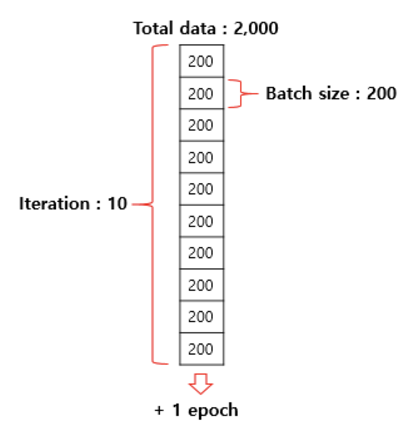

#### 3. 데이터 로드하기(Data Load)

In [135]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [136]:
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [137]:
x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  90],
                               [96,  98,  100],
                               [73,  66,  70]])
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [138]:
dataset = TensorDataset(x_train, y_train)

- shuffle=True를 선택하면 Epoch마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꿈.

In [139]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [140]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [141]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 40394.078125
Epoch    0/20 Batch 2/3 Cost: 10625.847656
Epoch    0/20 Batch 3/3 Cost: 5451.569824
Epoch    1/20 Batch 1/3 Cost: 937.502686
Epoch    1/20 Batch 2/3 Cost: 265.944641
Epoch    1/20 Batch 3/3 Cost: 244.422516
Epoch    2/20 Batch 1/3 Cost: 3.523124
Epoch    2/20 Batch 2/3 Cost: 55.838848
Epoch    2/20 Batch 3/3 Cost: 2.371109
Epoch    3/20 Batch 1/3 Cost: 21.615038
Epoch    3/20 Batch 2/3 Cost: 1.536160
Epoch    3/20 Batch 3/3 Cost: 23.620941
Epoch    4/20 Batch 1/3 Cost: 12.848326
Epoch    4/20 Batch 2/3 Cost: 17.578579
Epoch    4/20 Batch 3/3 Cost: 18.382185
Epoch    5/20 Batch 1/3 Cost: 11.401794
Epoch    5/20 Batch 2/3 Cost: 20.961008
Epoch    5/20 Batch 3/3 Cost: 28.939528
Epoch    6/20 Batch 1/3 Cost: 14.807928
Epoch    6/20 Batch 2/3 Cost: 2.599214
Epoch    6/20 Batch 3/3 Cost: 33.501408
Epoch    7/20 Batch 1/3 Cost: 16.869902
Epoch    7/20 Batch 2/3 Cost: 24.529007
Epoch    7/20 Batch 3/3 Cost: 10.461083
Epoch    8/20 Batch 1/3 Cost: 8.6

In [142]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]])
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[157.2804]], grad_fn=<AddmmBackward0>)


#### 4. 커스텀 데이터셋(Custom Dataset)
-  torch.utils.data.Dataset을 상속받아 직접 커스텀 데이터셋(Custom Dataset)을 만드는 경우

    class CustomDataset(torch.utils.data.Dataset):

    def __init__(self):
    데이터셋의 전처리를 해주는 부분

    def __len__(self):
    데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

    def __getitem__(self, idx):
    데이터셋에서 특정 1개의 샘플을 가져오는 함수

- len(dataset)을 했을 때 데이터셋의 크기를 리턴할 len
- dataset[i]을 했을 때 i번째 샘플을 가져오도록 하는 인덱싱을 위한 get_item

5. 커스텀 데이터셋(Custom Dataset)으로 선형 회귀 구현하기

In [143]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [144]:
# Dataset 상속
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  # 총 데이터의 개수를 리턴
  def __len__(self):
    return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

In [145]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [146]:
model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

- CustomDataset 클래스를 인스턴스화하여 데이터셋 객체를 만듦.
- 배치 크기는 한 번에 몇 개의 데이터를 모델에 입력할 지 결정
- shuffle은 모델이 학습하는 동안 데이터 순서에 의한 편향을 방지하기 위해 사용됨.

In [147]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 40548.742188
Epoch    0/20 Batch 2/3 Cost: 7291.494629
Epoch    0/20 Batch 3/3 Cost: 1811.472290
Epoch    1/20 Batch 1/3 Cost: 1189.893066
Epoch    1/20 Batch 2/3 Cost: 401.466431
Epoch    1/20 Batch 3/3 Cost: 98.862206
Epoch    2/20 Batch 1/3 Cost: 59.924492
Epoch    2/20 Batch 2/3 Cost: 5.559007
Epoch    2/20 Batch 3/3 Cost: 0.005015
Epoch    3/20 Batch 1/3 Cost: 7.238708
Epoch    3/20 Batch 2/3 Cost: 0.579787
Epoch    3/20 Batch 3/3 Cost: 9.432348
Epoch    4/20 Batch 1/3 Cost: 2.596285
Epoch    4/20 Batch 2/3 Cost: 6.112614
Epoch    4/20 Batch 3/3 Cost: 0.173577
Epoch    5/20 Batch 1/3 Cost: 0.585848
Epoch    5/20 Batch 2/3 Cost: 3.764531
Epoch    5/20 Batch 3/3 Cost: 4.496256
Epoch    6/20 Batch 1/3 Cost: 1.750809
Epoch    6/20 Batch 2/3 Cost: 2.692096
Epoch    6/20 Batch 3/3 Cost: 4.092447
Epoch    7/20 Batch 1/3 Cost: 0.873122
Epoch    7/20 Batch 2/3 Cost: 3.545633
Epoch    7/20 Batch 3/3 Cost: 4.466667
Epoch    8/20 Batch 1/3 Cost: 2.943422
Epoch   

In [148]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]])
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[153.5625]], grad_fn=<AddmmBackward0>)


### **03-05 벡터와 행렬 연산 복습하기**

#### 1. 벡터와 행렬과 텐서
- 벡터: 크기와 방향을 가진 양, 숫자가 나열된 형상이며 파이썬에서는 1차원 배열 또는 리스트로 표현됨.
- 행렬: 행과 열을 가지는 2차원 형상을 가진 구조, 파이썬에서는 2차원 배열로 표현
  - 가로줄: 행(row)
  - 세로줄: 열(column)
- 텐서: 3차원 부터, 파이썬에서는 3차원이상의 배열로 표현

#### 2. 텐서(Tensor)
- 인공 신경망은 복잡한 모델 내 연산을 주로 행렬 연산을 통해 해결함.

In [149]:
import numpy as np

1) 0차원 텐서(스칼라)
- 스칼라: 하나의 실수값으로 이루어진 데이터 -> 0차원 텐


In [150]:
d = np.array(5)
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 0
텐서의 크기(shape) : ()


-> ndim을 출력했을 때 나오는 값을 축(axis)의 개수 또는 텐서의 차원이라고 부름.

2) 1차원 텐서(벡터)
- 벡터의 차원과 텐서의 차원은 다른 개념: 터에서의 차원은 하나의 축에 놓인 원소의 개수를 의미하는 것이고, 텐서에서의 차원은 축의 개수를 의미

In [151]:
d = np.array([1, 2, 3, 4])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 1
텐서의 크기(shape) : (4,)


3) 2차원 텐서(행렬)

In [152]:
# 3행 4열의 행렬
d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 2
텐서의 크기(shape) : (3, 4)


4) 3차원 텐서(다차원 배열)

In [153]:
d = np.array([
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 3
텐서의 크기(shape) : (2, 3, 5)


- 자연어 처리에서 자주 쓰임. 시퀀스 데이터를 표현할 때 자주 사용됨.
  - samples 또는 batch_size는 샘플의 개수, timesteps는 시퀀스의 길이, word_dim은 단어를 표현하는 벡터의 차원을 의미함.

5) 그 이상의 텐서

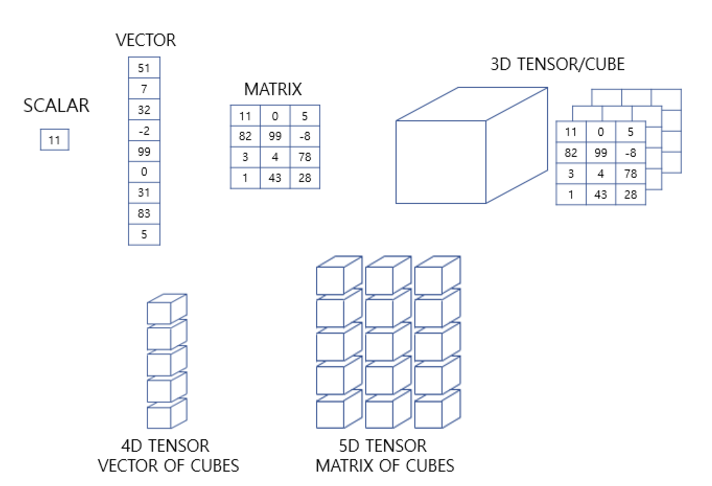

6) PyTorch에서의 텐서
- 2챕터의 '텐서 조작하기' 실습을 참고

#### 3. 벡터와 행렬의 연산

In [154]:
import numpy as np

1) 벡터와 행렬의 덧셈과 뺄셈
- 요소별 연산(element-wise)

In [155]:
A = np.array([8, 4, 5])
B = np.array([1, 2, 3])
print('두 벡터의 합 :',A+B)
print('두 벡터의 차 :',A-B)

두 벡터의 합 : [9 6 8]
두 벡터의 차 : [7 2 2]


In [156]:
A = np.array([[10, 20, 30, 40], [50, 60, 70, 80]])
B = np.array([[5, 6, 7, 8],[1, 2, 3, 4]])
print('두 행렬의 합 :')
print(A + B)
print('두 행렬의 차 :')
print(A - B)

두 행렬의 합 :
[[15 26 37 48]
 [51 62 73 84]]
두 행렬의 차 :
[[ 5 14 23 32]
 [49 58 67 76]]


2) 벡터의 내적과 행렬의 곱셈
- 내적의 조건: 두 벡터의 차원이 같아야 하며, 두 벡터 중 앞의 벡터가 행벡터(가로 방향 벡터)이고 뒤의 벡터가 열벡터(세로 방향 벡터)여야 함.
  - 두 행렬의 곱 A × B이 성립되기 위해서는 행렬 A의 열의 개수와 행렬 B의 행의 개수는 같아야 한다.
  - 두 행렬의 곱 A × B의 결과로 나온 행렬 AB의 크기는 A의 행의 개수와 B의 열의 개수를 가진다.
- 벡터의 내적 결과는 스칼라

In [157]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
print('두 벡터의 내적 :',np.dot(A, B))

두 벡터의 내적 : 32


In [158]:
A = np.array([[1, 3],[2, 4]])
B = np.array([[5, 7],[6, 8]])
print('두 행렬의 행렬곱 :')
print(np.matmul(A, B))

두 행렬의 행렬곱 :
[[23 31]
 [34 46]]


#### 4. 다중 선형 회귀 행렬 연산으로 이해하기

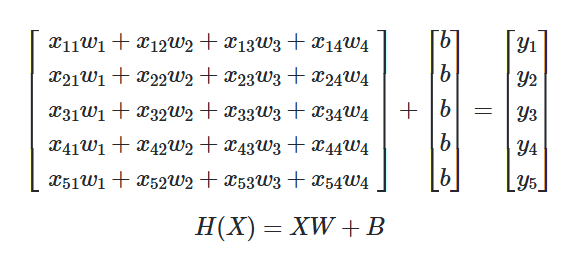

#### 5. 샘플(Sample)과 특성(Feature)
- 샘플: 머신 러닝에서 데이터를 셀 수 있는 단위로 구분할 때, 각각을 샘플이라고 부름.
- 특성: 종속 변수 y를 예측하기 위한 각각의 독립 변수 x를 특성이라고 부름.

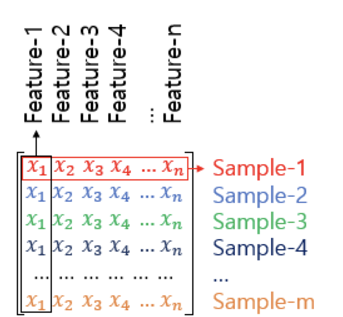

#### 6. 가중치의 편향 행렬의 크기 결정
- 행렬의 곱셈이 성립되려면 행렬의 곱셈에서 앞에 있는 행렬의 열의 크기와 뒤에 있는 행렬의 행의 크기는 같아야 함.-> 입력 행렬 X로부터 W행렬의 행의 크기가 결정됨.

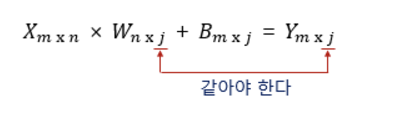